# <div style="text-align:center"> DS7333 - Case Study 10 | Boston Housing Dataset</div>
### <div style="text-align:center">Andy Ho, An Nguyen, Jodi Pafford</div>
<div style="text-align:center">July 10, 2019</div>

In [231]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [232]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

#Run to Pul Data into Excel
#bos.to_excel("Boston_Data.xlsx")

In [233]:
#Function to perform linear regression on data, compute MSE and Goodness of Fit
from sklearn.linear_model import LinearRegression

def Test(x, y, variable = [], control = [], percent = 0):
    
    lm = LinearRegression()
    lm.fit(x, y)
    Y_pred = lm.predict(x)
    if len(variable) == 0:
        txt = "Plot of prices vs predicted prices when 0% of data was replaced with 'NaN'."
    elif len(variable) == 1:
        txt = "Plot of prices vs predicted prices when " + str(percent) + "% of data in the " + \
              variable[0] + " column was replaced with 'NaN'." 
    elif len(control) == 1:
        txt = "Plot of prices vs predicted prices when " + str(percent) + "% of data in the " + \
              variable[0] + "and " + variable[1] + "column was replaced with 'NaN', only when " + \
              control[0] + "."

    plt.scatter(y, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.text(0, -20, txt, ha='left')
    plt.show()
    
    mse = sklearn.metrics.mean_squared_error(y, Y_pred)
    print('MSE is:', mse)
    
    # R2 (Goodness of Fit)
    r2 = r2_score(Y, Y_pred)
    print('Goodness of Fit is:',r2)

(506, 13)
(506,)


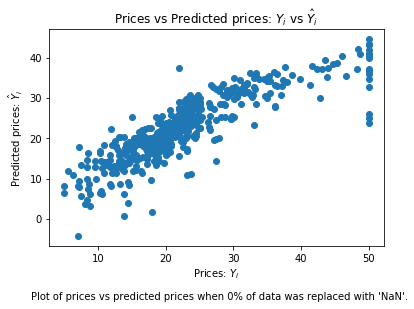

MSE is: 21.8977792176875
Goodness of Fit is: 0.7406077428649427


In [234]:
#Step 1 - Fit a Linear Regressor to the data

#Split Target from Explanatory 
Y = bos['PRICE']
X = bos.drop('PRICE', axis = 1)

print(X.shape)
print(Y.shape)

Test(X,Y)

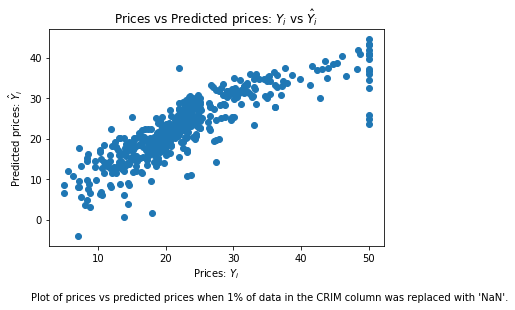

MSE is: 21.966915220082235
Goodness of Fit is: 0.7397887856760795


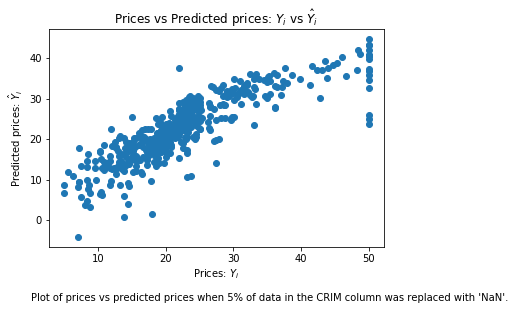

MSE is: 21.963046291530425
Goodness of Fit is: 0.7398346154426404


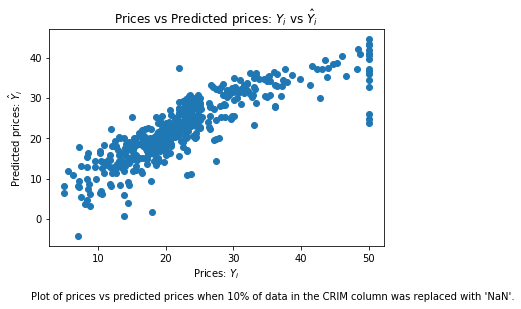

MSE is: 21.896161831190348
Goodness of Fit is: 0.7406269017727929


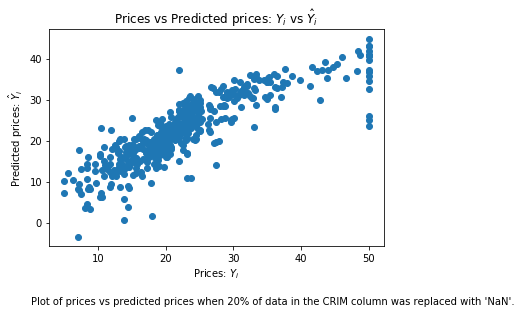

MSE is: 22.223151158810733
Goodness of Fit is: 0.7367535181338705


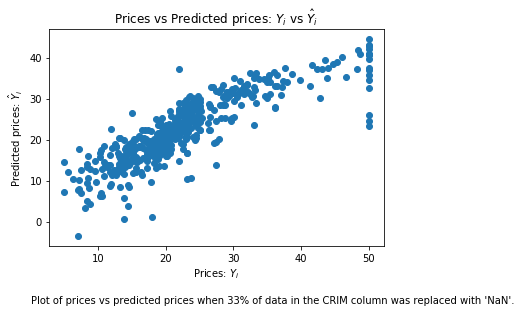

MSE is: 22.257658007503164
Goodness of Fit is: 0.7363447639273382


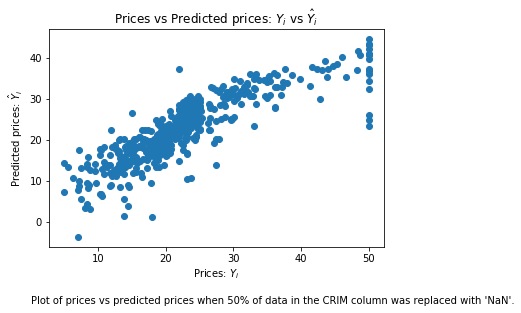

MSE is: 22.25147697538297
Goodness of Fit is: 0.7364179819398655


In [235]:
#Step 2 - Missing Completely at Random
#CRIM variable will be used for data replacement

import random

random.seed(2019) #set seed for reproducibility
set_percent = [1, 5, 10, 20, 33, 50] #percent of data to be replaced with 'NaN'

for p in set_percent:
    bos_NaN = bos.copy()
    n=int(len(bos_NaN)*(p/100)) #calculate length of sample 
    index=random.sample(list(bos_NaN.index),n) #sample from index
    bos_NaN.CRIM.iloc[index] = float('nan') #replace values with 'NaN'
    
    bos_NaN.CRIM=bos_NaN.CRIM.fillna(bos_NaN.CRIM.mean()) #impute 'NaN' with mean of variable
    
    Y = bos_NaN['PRICE']
    X = bos_NaN.drop('PRICE', axis = 1)
    
    
    Test(X, Y, variable=['CRIM'], percent=p)
    

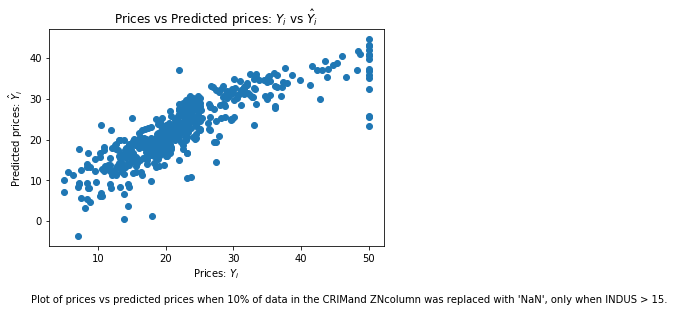

MSE is: 22.238220777708246
Goodness of Fit is: 0.7365750095088117


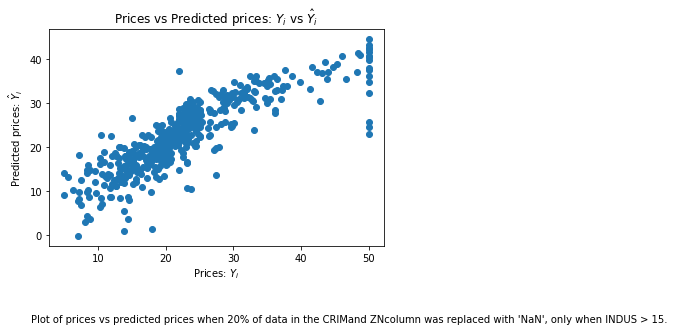

MSE is: 22.436191105334398
Goodness of Fit is: 0.734229932886282


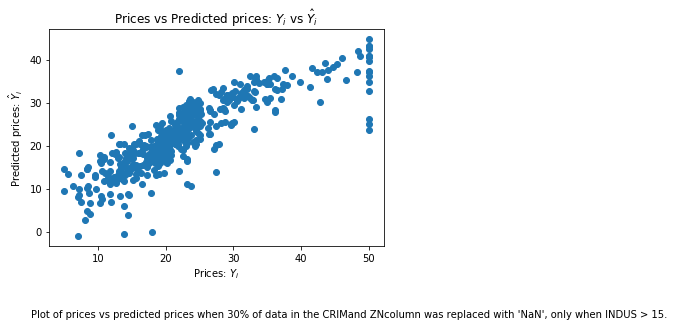

MSE is: 22.10843489239665
Goodness of Fit is: 0.7381124007392454


In [236]:
#Step 3 - Missing at Random
#CRIM and ZN variable will be used for data replacement
#when controled for INDUS, bigger than 15

set_percent = [10, 20, 30] #percent of data to be replaced with 'NaN'

for p in set_percent:
    bos_NaN = bos.copy()
    n=int(len(bos_NaN)*(p/100)) #calculate length of sample 
    index=random.sample(list(bos[bos.INDUS > 15].index),n) #sample from list of index where INDUS > 15
    bos_NaN.CRIM.iloc[index] = float('nan') #replace values with 'NaN'
    bos_NaN.ZN.iloc[index] = float('nan') #replace values with 'NaN'
    
    bos_NaN.CRIM=bos_NaN.CRIM.fillna(bos_NaN.CRIM.mean()) #impute 'NaN' with mean of variable
    bos_NaN.ZN=bos_NaN.ZN.fillna(bos_NaN.ZN.mean()) #impute 'NaN' with mean of variable
    
    Y = bos_NaN['PRICE']
    X = bos_NaN.drop('PRICE', axis = 1)
    
    Test(X, Y, variable = ['CRIM', 'ZN'], control = ['INDUS > 15'], percent=p, )